In [13]:
####Izhichevich Neuron
import numpy as np
import matplotlib.pyplot as plt


class IzhikevichNetwork:

    def __init__(self, size):
        self.Size = size                        # number of neurons in the network
        self.Voltages = np.zeros(size) - 65     # neuron activation vector
        self.u = np.zeros(size)                 # neuron activation vector
        self.a = np.ones(size)                  # a
        self.b = np.zeros(size)                 # b
        self.c = np.zeros(size)                 # c
        self.d = np.zeros(size)                 # d
        self.Weights = np.zeros((size,size))    # weight matrix
        self.Inputs = np.zeros(size)            # neuron output vector
        self.Firing = np.zeros(size)

    def pcnnParams(self):
        for i in range(self.Size):
            #self.Weights[i] = [.5,.5,.5]
            #self.Weights[i] = 0.5*np.random.uniform(0,1,size=self.Size)
            r = np.random.random()
            self.a[i] = 0.02
            self.b[i] = 0.2
            self.c[i] = -50
            self.d[i] = 2
            #self.c[i] = -65+15*r**2
            #self.d[i] = 8-6*r**2
        self.Weights = [[0,0,0],[-.5,0,]]

    def step(self, dt, inputs):
        self.Inputs += inputs
        # Update state
        dVdt = (0.04 * (self.Voltages**2)) + (5 * self.Voltages) + 140.0 - self.u + self.Inputs
        dudt = self.a * ((self.b * self.Voltages) - self.u)
        self.Voltages += dt * dVdt
        self.u += dt * dudt
        # Detect firings
        self.Firing = np.where(self.Voltages < 30.0, 0, 1)
        self.Voltages = self.Voltages * (1-self.Firing) + self.c * self.Firing
        self.u = self.u + self.d * self.Firing
        # Prepare synaptic input for next step
        self.Inputs = np.dot(self.Weights, self.Firing) ### Check if it should be .T or not
        #print(self.Weights, firing, self.Inputs)

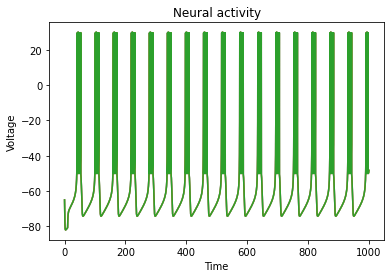

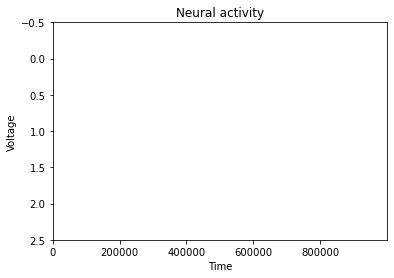

In [14]:
####Network of 3 Izhichevich Neurons

# Global Parameters
size = 3
duration = 1000
stepsize = 0.001

time = np.arange(0.0,duration,stepsize)

nn = IzhikevichNetwork(size)
nn.pcnnParams()

outputs = np.zeros((len(time),size))
firings = np.zeros((len(time),size))

# Run simulation
step = 0
inputs = np.zeros(size)
for t in time:
    if t > 10:
        inputs = 10*np.ones(size)
    nn.step(stepsize, inputs)
    outputs[step] = nn.Voltages
    firings[step] = nn.Firing
    step += 1

# Plot activity
plt.plot(time,outputs)
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("Neural activity")
plt.show()

# Plot activity
plt.imshow(firings.T, cmap='Greys', interpolation='nearest', aspect='auto')
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("Neural activity")
plt.show()

In [ ]:
####Graph all 3 time series

In [ ]:
####Determine beginning and end of each burst for each neuron

In [ ]:
####Graph phase variation

In [ ]:
####Calculate phase invariance metric